<a href="https://colab.research.google.com/github/SangDal/KDT/blob/main/8.%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC/5_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 사용 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

#1.네이버 영화 리뷰 데이터셋
* 총 200,000개의 리뷰로 구성된 데이터로, 영화리뷰를 긍/부정으로 분류하기 위해 만들어진 데이터셋
* 리뷰가 긍정인 경우1, 부정인경우 0으로 표시한 레이블로 구성되어 있음

    * 트레인셋 https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
    * 테스트셋 https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [ ]:
# 네이버 영화리뷰 데이터셋 써보기
import urllib.request
import pandas as pd

In [ ]:
# 위에 데이터셋 URL을 이용하여 파일이름 바꿔서 다운 받기
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', filename = 'ratings_train.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', filename = 'ratings_test.txt')

('ratings_test.txt', <http.client.HTTPMessage at 0x7fa54ac53580>)

In [ ]:
# 데이터셋을 데이터 프레임으로 바꾸기
train_dataset = pd.read_table('ratings_test.txt')
train_dataset

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
# 총 데이터 수 확인하기
len(train_dataset)

50000

#2.데이터 전처리하기

In [ ]:
# 결측치를 확인하고 결측치를 제거
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
train_dataset.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [ ]:
# 트레인 데이터셋의 빈문자열이 존재하면 T, 없으면 F
train_dataset.replace('',float('NaN'), inplace=True)
print(train_dataset.isnull().values.any())

True


In [ ]:
# 필터링 된 데이터셋 갯수 확인
train_dataset = train_dataset.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수 {len(train_dataset)}')

필터링된 데이터셋 총 개수 49997


In [ ]:
# 중복 되는 단어 확인하기
loc_df = train_dataset.loc[train_dataset.duplicated(subset=['document']), :]
print(loc_df)

            id                  document  label
857    2084375                       bad      0
956     195683                     재미있어요      1
1089   2235528                       볼만함      1
1149   4409686                         굿      1
1600   3805716                        최고      1
...        ...                       ...    ...
49728  7437033                        별로      0
49757  5890883                      최악이다      0
49764  4032953                        최고      1
49838  8097768  2년이 지나도 잊혀지지 않는 소중한 드라마.      1
49931  6929887                         굿      1

[840 rows x 3 columns]


In [ ]:
# 열을 기준으로 중복 데이터 제거
train_dataset = train_dataset.drop_duplicates(['document']).reset_index(drop=True)
train_dataset

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49154,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
# 맨앞에 있는 글자수 찾아내기
len(train_dataset.iloc[0][1])

3

In [ ]:
# 한글이 아닌 문자를 포함하는 데이터 제거(ㅋㅋㅋ 이런건 제거 하지 않음)
# 데이터셋에 특수 문자를 제거하기
train_dataset['document'] = train_dataset['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', ' ')
train_dataset

<ipython-input-13-1fe7f6fe5956>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_dataset['document'] = train_dataset['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', ' ')


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49154,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [ ]:
# 너무 짧은 단어를 제거( 단어의 길이가 1이하인건 제거 )
train_dataset['document'] = train_dataset['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 1]))
train_dataset

,id,document,label
0,6270596,,1
1,9274899,,0
2,8544678,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,아니었어도 다섯 줬을텐데 나와서 심기를 불편하게 하죠,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49154,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 영화 재미도 없고 기분만 잡치고 세트장에서 해먹네,0


In [ ]:
# 전체 길이가 10이하이거나 전체 단어 개수가 5개 이하인 데이터를 제거
train_dataset = train_dataset[train_dataset.document.apply(lambda x: len(str(x)) > 10 and len(str(x).split()) > 5)].reset_index(drop=True)
train_dataset

,id,document,label
0,8544678,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0
1,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
2,6723715,아니었어도 다섯 줬을텐데 나와서 심기를 불편하게 하죠,0
3,6097171,마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가 고개를 젖게한다,0
4,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한 ...,0
...,...,...,...
24616,5494272,액션영화로 기대하지말고 스릴러영화라 생각하고 보면 괜찮은 영화인듯,1
24617,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
24618,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
24619,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0


In [ ]:
# 불용어를 사용하기 위한 설치
!pip install konlpy

In [ ]:
# 태그 분석기
from konlpy.tag import Okt

In [ ]:
#불용어 직접 만들기
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
train_dataset = list(train_dataset['document'])
# train_dataset

In [ ]:
# 형태소 분석하기
okt = Okt()

tokenized_data = []

for sentence in train_dataset:

    tokenized_sentence = okt.morphs(sentence, stem=True)# stem= true는 단어의 원형으로 해준다.
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

In [ ]:
tokenized_data[0]

['뭐', '야', '평점', '나쁘다', '않다', '짜다', '리', '더', '더욱', '아니다']

In [ ]:
# matplotlib hist함수로 length of samples 와 number of samples를 표현
# 리뷰의 최대 길이와 평균길이를 출력해보기
import matplotlib.pyplot as plt

리뷰의 길이:  64
리뷰의 길이:  15.707647942813045


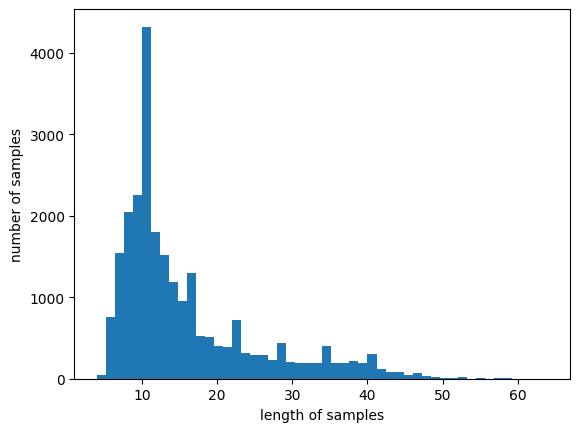

In [ ]:
print('리뷰의 길이: ', max(len(review) for review in tokenized_data))
print('리뷰의 길이: ', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review)for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#3.워드 임베딩 구축

In [ ]:
from gensim.models import Word2Vec

In [ ]:
embedding_dim = 100

model = Word2Vec(
    sentences = tokenized_data,
    vector_size = embedding_dim,           #차원을 몇으로 줄거야?
    window = 5,                     # 윈도우 사이즈를 몇으로 줄껀데?
    min_count = 5,                  # 최소 카운트
    workers =4,                     # 쓰레드 숫자
    sg = 0                          # sg : 0(CBOW), 1(Skip-gram)

)

In [ ]:
# 임베딩 행렬의 크기,
# 단어 사전에는 총 12107개의 단어가 존재하고, 각각의 단어는 미리 설정한 embedding_dim=100 차원으로 구성 되어있다.
model.wv.vectors.shape

(6336, 100)

In [ ]:
word_vectors = model.wv
vocabs = list(word_vectors.index_to_key)
vocabs[:20]

['영화',
 '보다',
 '을',
 '없다',
 '있다',
 '이다',
 '좋다',
 '너무',
 '정말',
 '같다',
 '적',
 '되다',
 '아니다',
 '만',
 '않다',
 '로',
 '진짜',
 '에서',
 '연기',
 '만들다']

In [ ]:
for sim_word in model.wv.most_similar('영화'):
    print(sim_word)

('명작', 0.8167708516120911)
('애니', 0.7926102876663208)
('공포영화', 0.7677071690559387)
('애니메이션', 0.7664753794670105)
('수작', 0.7600941061973572)
('드라마', 0.7592675089836121)
('해도', 0.754827082157135)
('다행', 0.7513459920883179)
('내생', 0.7508854269981384)
('영화로', 0.7473562955856323)


In [ ]:
# 두 단어 비교
model.wv.similarity('좋다','괜찮다')

0.7980504

#4.워드 임베딩 시각화

In [ ]:
import matplotlib.font_manager

In [ ]:
# 폰트들 보기
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumGothic']

In [ ]:
plt.rc('font', family = 'NanumMyeongjo')

In [ ]:
word_vector_list = [word_vectors[word] for word in vocabs]
word_vector_list[0] #0번에 있는애들 개수: 100개 위에서 embedding_dim=100 차원을 줬기때문에

array([-0.01597062, -0.12198693,  0.03150015,  0.41822064, -0.3070385 ,
       -0.8480891 ,  0.71403104,  0.3071204 , -0.40087673,  0.01373895,
        0.48301443, -1.1686192 ,  0.36477914,  0.4249862 , -0.07141691,
       -0.25633925,  0.51673776, -0.24207863, -0.82119846, -1.4267982 ,
        0.68607783,  0.09630875,  0.29430723, -0.11325417,  0.8576497 ,
       -0.303817  , -0.0592801 , -0.03953787, -0.42294767, -0.30437997,
        0.24857399, -0.16399416,  1.025376  , -0.79877853, -0.22259517,
        0.73923093,  0.39689052, -0.13833715, -0.212219  , -0.91495734,
       -0.6166531 , -0.252323  , -0.06614281, -0.32655644,  0.25998527,
       -0.18616591, -0.56623316,  0.43442786,  0.12687686,  0.28937063,
       -0.6098055 ,  0.27884504, -0.27011538,  0.4189351 ,  0.54322255,
       -0.4341934 ,  0.3008655 , -0.13750422, -0.5468005 ,  0.86051345,
        0.2178388 , -0.5585472 ,  0.49187428, -0.29533008, -0.18254259,
        0.08005685, -0.07304022,  0.31836239, -0.5809685 ,  0.91

In [ ]:
# PCA가 자주 이용되는 차원 축소 방식이긴 하지만 군집의 변별력을 해친다는 단점이 있음
# 따라서, PCA를 개선한 방법이 t-SNE 차원 축소 방식

from sklearn.manifold import TSNE
import numpy as np

In [ ]:
tsne = TSNE(learning_rate=100)
transformed = tsne.fit_transform(np.array(word_vector_list))

x_axis_tsne = transformed[:, 0]
y_axis_tsne = transformed[:, 1]

In [ ]:
def plot_tsne_graph(vocabs, x_asix, y_asix):
    plt.figure(figsize=(30,30))
    plt.scatter(x_asix, y_asix, marker ='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(x_asix[i], y_asix[i]))

In [ ]:
plot_tsne_graph(vocabs, x_axis_tsne, y_axis_tsne)

#5.TSNE 고도화
* 파이썬에서 제공하는 interactive visualization library인 [bokey](https://docs.bokeh.org/en/latest/)를 사용하여 시각화 고도화를 해봅시다 ~


In [ ]:
import pickle

In [ ]:
tsne_df = pd.DataFrame(transformed, columns=['x_coord', 'y_coord'])

In [ ]:
tsne_df

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

In [ ]:
def plot_tsne_graph(vocabs, x_asix, y_asix):
  plt.figure(figsize=(30, 30))
  plt.scatter(x_asix, y_asix, marker = 'o')
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(x_asix[i], y_asix[i]))

In [ ]:
output_notebook()

In [ ]:
# prepare the data in a form suitable for bokeh.
plot_data = ColumnDataSource(tsne_df)

# create the plot and configure it
tsne_plot = figure(title='t-SNE Word Embeddings',
  plot_width = 800,
  plot_height = 800,
  active_scroll='wheel_zoom'
)

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@word') )
tsne_plot.circle(
    'x_coord', 'y_coord', source=plot_data,
    color='red', line_alpha=0.2, fill_alpha=0.1,
    size=10, hover_line_color='orange'
  )

# adjust visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# show time!
show(tsne_plot);